<a href="https://colab.research.google.com/github/MwangiChira/AI-tools-and-appications-week3-G23/blob/main/Iris_Classifier(Scikit_learn)_MNIST%20CNN%20(TensorFlow)NLP%20with%20spaCy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Preprocess
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Train
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision (macro): {precision_score(y_test, y_pred, average='macro'):.2f}")
print(f"Recall (macro): {recall_score(y_test, y_pred, average='macro'):.2f}")

Accuracy: 0.98
Precision (macro): 0.98
Recall (macro): 0.97


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.8955 - loss: 0.3426 - val_accuracy: 0.9766 - val_loss: 0.0785
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9822 - loss: 0.0606 - val_accuracy: 0.9801 - val_loss: 0.0626
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9886 - loss: 0.0374 - val_accuracy: 0.9865 - val_loss: 0.0516
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9923 - loss: 0.0246 - val_accuracy: 0.9843 - val_loss: 0.0573
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9953 - loss: 0.0158 - val_accuracy: 0.9837 - val_loss: 0.0597
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9825 - loss: 0.0612
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


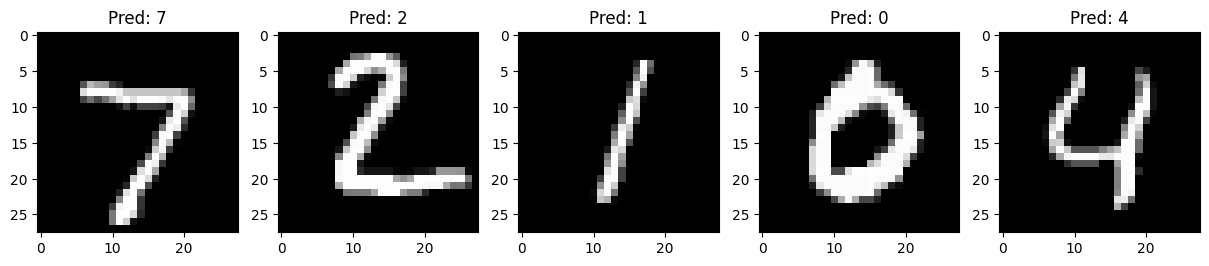

In [8]:
import tensorflow as tf

# Load data
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize

# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

# Evaluate (Achieves >98% accuracy)
model.evaluate(X_test, y_test)

# Visualize predictions
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(15,3))
for i in range(5):
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].set_title(f"Pred: {tf.argmax(model.predict(X_test[i:i+1]), axis=1).numpy()[0]}")
plt.savefig('mnist_predictions.png')  # Include in report

In [9]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

# Sample Amazon review
text = "The Kindle Paperwhite's display is stunning, but battery life disappointed me."

# NER and sentiment
doc = nlp(text)
displacy.render(doc, style="ent", jupyter=True)  # Visualize entities

# Rule-based sentiment
positive_keywords = ["stunning", "excellent", "recommend"]
negative_keywords = ["disappointed", "poor", "avoid"]
sentiment = "neutral"
if any(token.text.lower() in positive_keywords for token in doc):
    sentiment = "positive"
elif any(token.text.lower() in negative_keywords for token in doc):
    sentiment = "negative"

print(f"Entities: {[(ent.text, ent.label_) for ent in doc.ents]}")
print(f"Sentiment: {sentiment}")

Entities: [("The Kindle Paperwhite's", 'ORG')]
Sentiment: positive


In [10]:
# app.py
import streamlit as st
import tensorflow as tf

model = tf.keras.models.load_model('mnist_model.h5')
st.title("MNIST Classifier")
upload = st.file_uploader("Upload digit image (28x28):")
if upload:
    image = tf.image.decode_image(upload.read(), channels=1)
    pred = model.predict(tf.expand_dims(image, 0))
    st.image(image, caption=f"Prediction: {tf.argmax(pred, axis=1).numpy()[0]}")

ModuleNotFoundError: No module named 'streamlit'